# Проект: Линейные модели в машинном обучении. Прогнозирование удоя и вкуса молока коров для фермерского хозяйства «Вольный луг»

### Цели и описание проекта



**Описание проекта:** Фермерское хозяйство «Вольный луг» стремится увеличить поголовье стада коров, чтобы улучшить качество и количество молока, производимого на ферме. Для этого фермер заключил контракт с ассоциацией пастбищ «ЭкоФерма», которая предоставляет доступ к качественным бурёнкам. В условиях жесткого отбора коров, фермер хочет обеспечить, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а молоко соответствовало строгим критериям вкуса. Для достижения этих целей необходимо разработать модель машинного обучения, которая поможет в принятии обоснованных решений о покупке, основываясь на объективных данных о характеристиках коров и кормов.

**Цель исследования:** Провести исследовательский анализ данных и создать две прогнозные модели: одну для оценки возможного удоя коровы и другую для определения вероятности получения вкусного молока. Эти модели позволят фермеру выбрать коров, соответствующих его критериям качества и производительности.

**Ход исследования:**

- **Загрузка данных:** Загрузка и изучение трех датасетов: ferma_main.csv, ferma_dad.csv и cow_buy.csv, которые содержат информацию о текущем стаде коров, их родословной и коровах, доступных для покупки.

- **Предобработка данных:** Проверка данных на наличие пропусков и дубликатов, а также корректность типов данных. При необходимости будет выполнено переименование столбцов для удобства анализа.

- **Исследовательский анализ данных:** Проведение статистического анализа всех признаков, создание графиков для визуализации распределения характеристик коров и кормов. Выявление выбросов и аномалий в данных.

- **Корреляционный анализ:** Оценка взаимосвязи между различными признаками, расчет коэффициентов корреляции и построение диаграмм рассеяния для анализа зависимости удоя и других количественных признаков.

- **Задача регрессии:** Обучение трех моделей линейной регрессии для прогнозирования удоя, с последующей оценкой их качества и анализом остатков.

- **Задача классификации:** Обучение модели логистической регрессии для прогнозирования вкуса молока, с оценкой её качества по метрикам precision и recall.

**Общий вывод:** Проект позволит фермеру принимать более обоснованные решения о покупке коров, опираясь на предсказания моделей о потенциальном удое и качестве молока. Ожидается, что результаты исследования помогут в минимизации рисков и увеличении эффективности молочного хозяйства. Рекомендации по улучшению моделей и оптимизации процессов кормления также будут представлены.

### 1. Загрузка и изучение данных

In [ ]:
!pip install phik -q

In [ ]:
import numpy as np
import pandas as pd
import phik
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    recall_score,
    precision_score,
)

In [ ]:
ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';', decimal = ',')
ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';', decimal = ',')
cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';', decimal = ',')
shape_ferma_main = ferma_main.shape[0]

In [ ]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [ ]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [ ]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [ ]:
columns_rename={
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'father_breed',
    'Текущая_жирность,%': 'fat_content',
    'Текущий_уровень_белок,%': 'protein',
    'Возраст': 'age',
    'Удой, кг': 'milk_yield',
    'ЭКЕ (Энергетическая кормовая единица)': 'energy_fe',
    'Сырой протеин, г': 'raw_protein',
    'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'bull_father_breed',
    'Жирность,%': 'fat_content',
    'Белок,%': 'protein',
    'Вкус молока': 'milk_taste',
    'Имя Папы': 'bull_father_name',
    'Имя_папы': 'bull_father_name'
}

In [ ]:
ferma_main.rename(columns=columns_rename, inplace=True)
ferma_dad.rename(columns=columns_rename, inplace=True)
cow_buy.rename(columns=columns_rename, inplace=True)

In [ ]:
ferma_main.head()

,id,milk_yield,energy_fe,raw_protein,sugar_protein_ratio,breed,pasture_type,bull_father_breed,fat_content,protein,milk_taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [ ]:
cow_buy.head()

,breed,pasture_type,bull_father_breed,bull_father_name,fat_content,protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


#### Выводы по разделу Загрузка и изучение данных
- Данные загружены с разделителем (";") и разделителем десятичной записи чисел точкой ('.').
- Перименованы наименования столбцов в исходных данных

### 2. Предобработка данных

In [ ]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   milk_yield           634 non-null    int64  
 2   energy_fe            634 non-null    float64
 3   raw_protein          634 non-null    int64  
 4   sugar_protein_ratio  634 non-null    float64
 5   breed                634 non-null    object 
 6   pasture_type         634 non-null    object 
 7   bull_father_breed    634 non-null    object 
 8   fat_content          634 non-null    float64
 9   protein              634 non-null    float64
 10  milk_taste           634 non-null    object 
 11  age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [ ]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   breed              20 non-null     object 
 1   pasture_type       20 non-null     object 
 2   bull_father_breed  20 non-null     object 
 3   bull_father_name   20 non-null     object 
 4   fat_content        20 non-null     float64
 5   protein            20 non-null     float64
 6   age                20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [ ]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                629 non-null    int64 
 1   bull_father_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [ ]:
ferma_main['age'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [ ]:
cow_buy['age'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [ ]:
ferma_main['milk_taste'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [ ]:
columns = ['milk_yield', 'energy_fe', 'raw_protein', 'sugar_protein_ratio', 'fat_content', 'protein']
ferma_main[columns] = ferma_main[columns].astype('float64')
columns = [ 'fat_content', 'protein']
cow_buy[columns] = cow_buy[columns].astype('float64')

In [ ]:
ferma_main.head()

,id,milk_yield,energy_fe,raw_protein,sugar_protein_ratio,breed,pasture_type,bull_father_breed,fat_content,protein,milk_taste,age
0,1,5863.0,14.2,1743.0,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529.0,12.8,2138.0,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810.0,14.0,1854.0,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895.0,12.4,2012.0,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302.0,12.8,1675.0,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [ ]:
cow_buy.head()

,breed,pasture_type,bull_father_breed,bull_father_name,fat_content,protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [ ]:
ferma_main.duplicated().sum()

5

In [ ]:
ferma_main.drop_duplicates(inplace=True)

In [ ]:
cow_buy.duplicated().sum()

4

In [ ]:
cow_buy[cow_buy.duplicated()]

,breed,pasture_type,bull_father_breed,bull_father_name,fat_content,protein,age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [ ]:
ferma_main.isna().sum()

id                     0
milk_yield             0
energy_fe              0
raw_protein            0
sugar_protein_ratio    0
breed                  0
pasture_type           0
bull_father_breed      0
fat_content            0
protein                0
milk_taste             0
age                    0
dtype: int64

In [ ]:
cow_buy.isna().sum()

breed                0
pasture_type         0
bull_father_breed    0
bull_father_name     0
fat_content          0
protein              0
age                  0
dtype: int64

In [ ]:
cat_columns = ['breed',	'pasture_type',	'bull_father_breed', 'milk_taste',	'age']
for col in cat_columns:
    print(col,':')
    print(ferma_main[col].unique())
    print()

breed :
['Вис Бик Айдиал' 'РефлешнСоверинг']

pasture_type :
['Равнинное' 'Равнинные' 'Холмистое']

bull_father_breed :
['Айдиал' 'Соверин' 'Айдиалл']

milk_taste :
['вкусно' 'не вкусно']

age :
['более_2_лет' 'менее_2_лет']



In [ ]:
cat_columns = ['breed',	'pasture_type',	'bull_father_breed', 'age']
for col in cat_columns:
    print(col,':')
    print(cow_buy[col].unique())
    print()

breed :
['Вис Бик Айдиал' 'РефлешнСоверинг']

pasture_type :
['холмистое' 'равнинное']

bull_father_breed :
['Айдиал' 'Соверин']

age :
['более_2_лет' 'менее_2_лет']



In [ ]:
ferma_main.replace({'Равнинные': 'Равнинное', 'Айдиалл': 'Айдиал'}, inplace=True)
cow_buy.replace({'равнинное': 'Равнинное', 'холмистое': 'Холмистое'}, inplace=True)

In [ ]:
ferma_dad['bull_father_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

#### Выводы по разделу Предобработка данных:

- Признаки 'milk_yield', 'energy_fe', 'raw_protein', 'sugar_protein_ratio', 'fat_content', 'protein' преобразованы в формат 'float64'.
- В датасете ferma_main обнаружены и удалены полные дубликаты записей.
- В датасете cow_buy также найдены дубликаты, но принято решение не удалять их, так как эти данные не будут использоваться для обучения моделей.
- Пропуски в данных не обнаружены.
- Обнаружены несоответствия в написании категориальных признаков 'breed', 'pasture_type', 'bull_father_breed', 'milk_taste', 'age'. Категориальные переменные в датасетах ferma_main и cow_buy приведены к единому формату для согласованности данных.

### 3. Исследовательский анализ данных

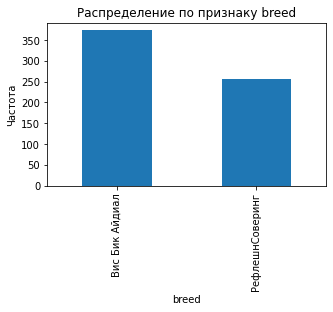

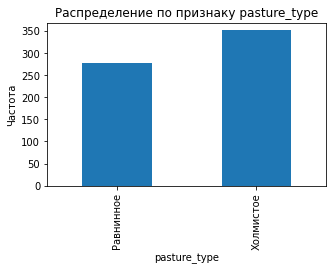

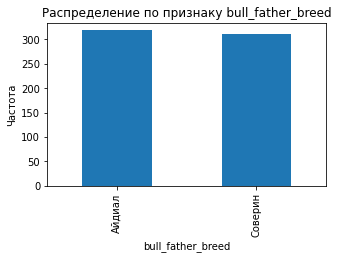

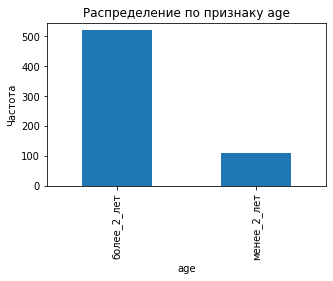

In [ ]:
for column in cat_columns:
    ferma_main.groupby(column)[column].count().plot(kind='bar', figsize=(5,3));
    plt.title('Распределение по признаку '+ column)
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()

In [ ]:
val_columns = ['milk_yield','energy_fe','raw_protein','sugar_protein_ratio','fat_content','protein']
ferma_main[val_columns].describe()

,milk_yield,energy_fe,raw_protein,sugar_protein_ratio,fat_content,protein
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


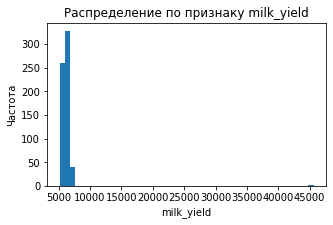

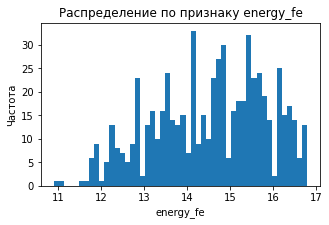

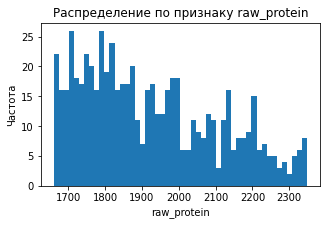

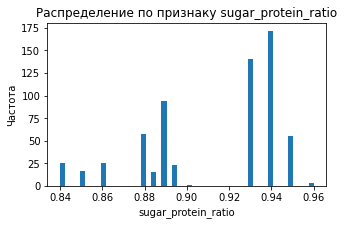

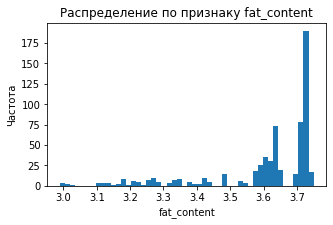

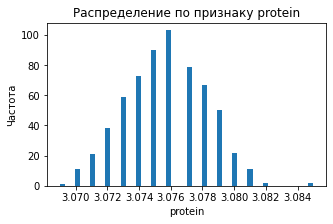

In [ ]:
for column in val_columns:
    ferma_main[column].plot(kind='hist', bins=50, figsize=(5,3));
    plt.title('Распределение по признаку '+ column)
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()

In [ ]:
ferma_main=ferma_main.query('milk_yield<10000')

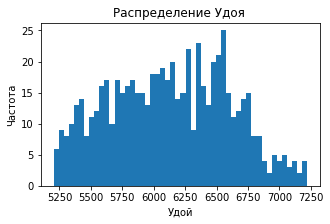

In [ ]:
ferma_main['milk_yield'].plot(kind='hist', bins=50, figsize=(5,3));
plt.title('Распределение Удоя ')
plt.xlabel('Удой')
plt.ylabel('Частота')
plt.show()

- Нормальное распределение наблюдается в количественных признаках milk_yield, protein, energy_fe, равномерное распределение у признака sugar_protein_ratio, по остальным признакам сложно определить расределение

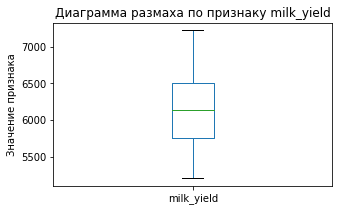

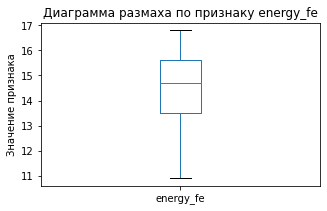

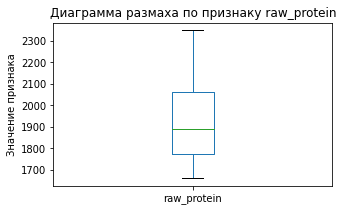

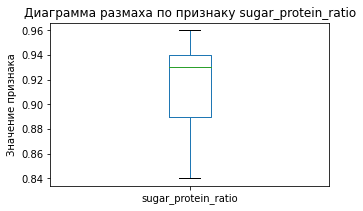

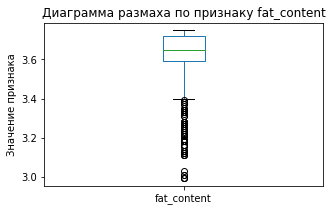

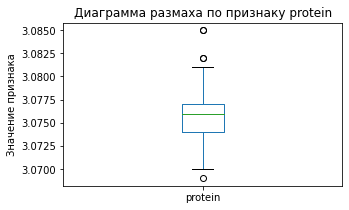

In [ ]:
for column in val_columns:
    ferma_main[column].plot(kind='box',  figsize=(5,3));
    plt.title('Диаграмма размаха по признаку '+ column)
    plt.ylabel('Значение признака')
    plt.show()

In [ ]:
ferma_main.query('fat_content<3.45').describe()

,id,milk_yield,energy_fe,raw_protein,sugar_protein_ratio,fat_content,protein
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,317.750000,5635.490385,13.000000,1805.201923,0.875673,3.265962,3.075740
std,182.287448,345.530772,1.007737,132.618614,0.028147,0.115267,0.002527
min,4.000000,5204.000000,10.900000,1662.000000,0.840000,2.990000,3.070000
25%,172.750000,5360.250000,12.300000,1702.750000,0.850000,3.180000,3.074000
50%,299.000000,5592.000000,12.800000,1758.500000,0.880000,3.270000,3.076000
75%,479.250000,5784.250000,13.525000,1881.500000,0.890000,3.340000,3.078000
max,623.000000,7014.000000,15.700000,2267.000000,0.950000,3.440000,3.085000


In [ ]:
ferma_main.shape[0]/shape_ferma_main

0.9905362776025236

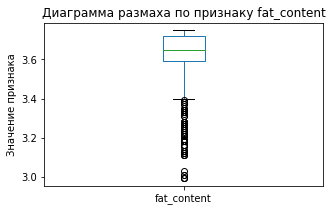

In [ ]:
ferma_main['fat_content'].plot(kind='box',  figsize=(5,3));
plt.title('Диаграмма размаха по признаку fat_content')
plt.ylabel('Значение признака')
plt.show()

In [ ]:
cow_buy.describe()

,fat_content,protein
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


In [ ]:
ferma_main.describe()

,id,milk_yield,energy_fe,raw_protein,sugar_protein_ratio,fat_content,protein
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


#### Вывод по разделу Исследовательский анализ данных:

- Категориальные признаки распределены равномерно, за исключением возраста коров: как и ожидалось, в стаде преобладают коровы старше 2 лет.
- В признаке 'milk_yield' были обнаружены и удалены аномальные значения.
- В признаке 'fat_content' также выявлены аномальные значения, однако было решено их не удалять.
- Подтверждено, что значения признаков из датасета cow_buy находятся в допустимых диапазонах значений признаков из ferma_main.
- Нормальное распределение наблюдается в количественных признаках milk_yield, protein, energy_fe, равномерное распределение у признака sugar_protein_ratio, по остальным признакам сложно определить расределение


### 4. Корреляционный анализ признаков

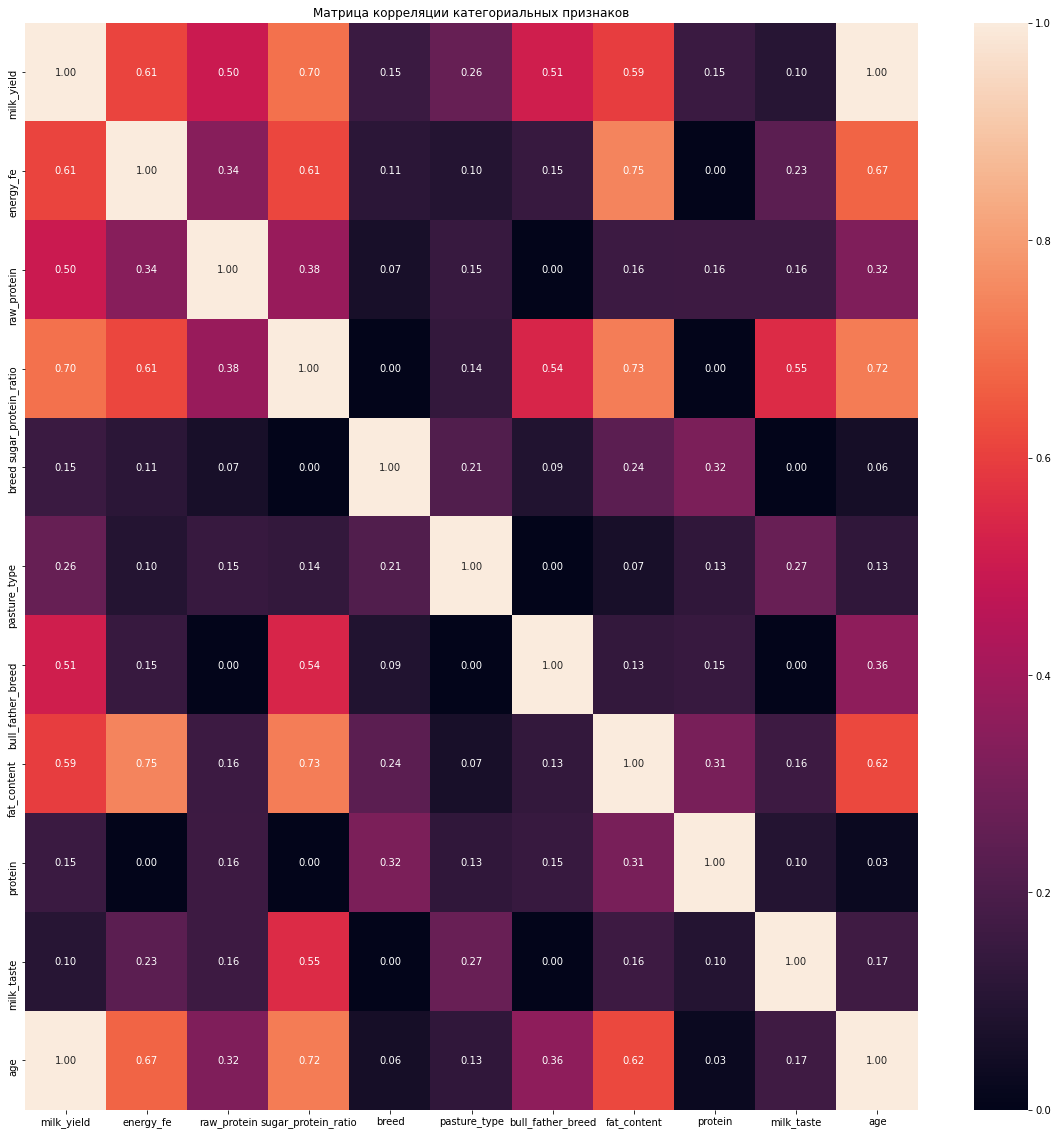

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(ferma_main.iloc[:, 1:].phik_matrix(interval_cols=val_columns, bins=20), annot=True, fmt='.2f')
plt.title('Матрица корреляции категориальных признаков')
plt.show()

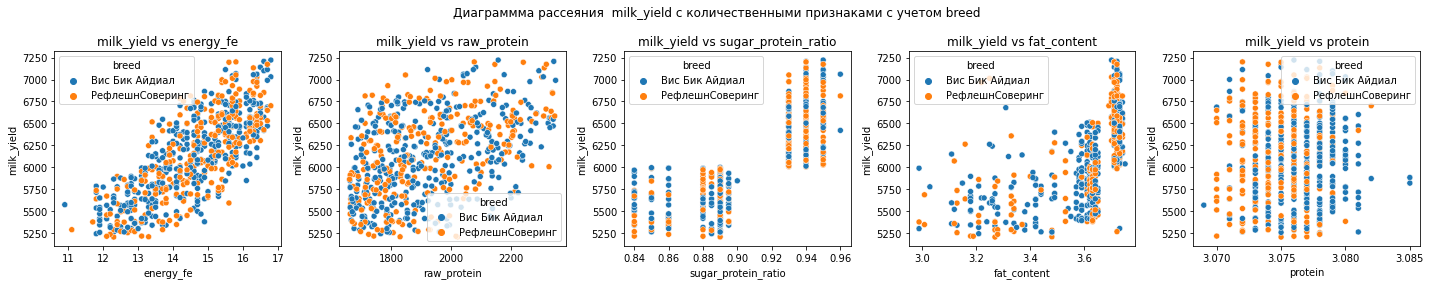

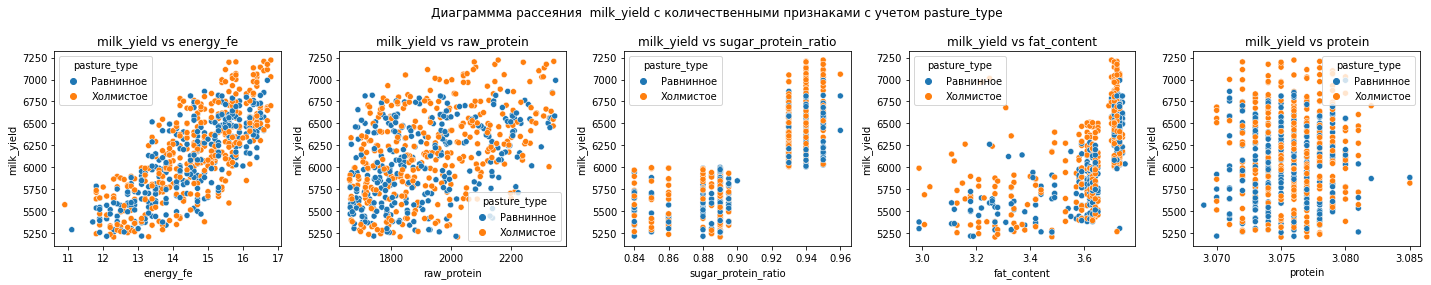

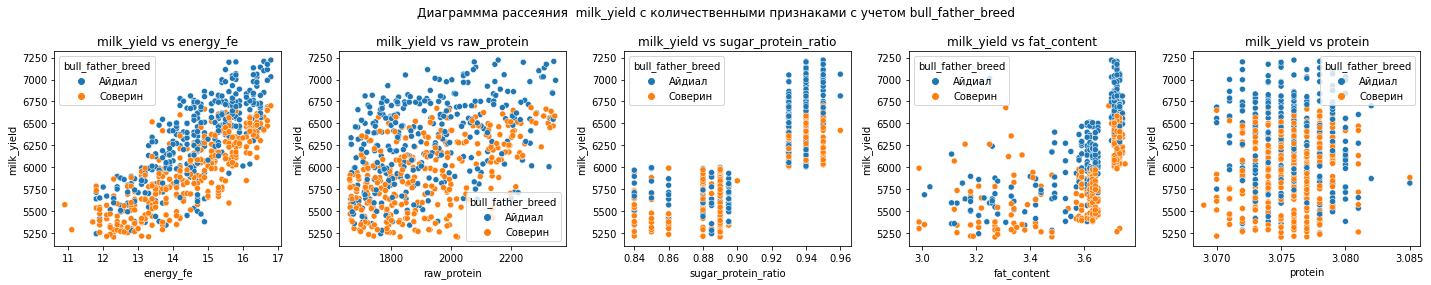

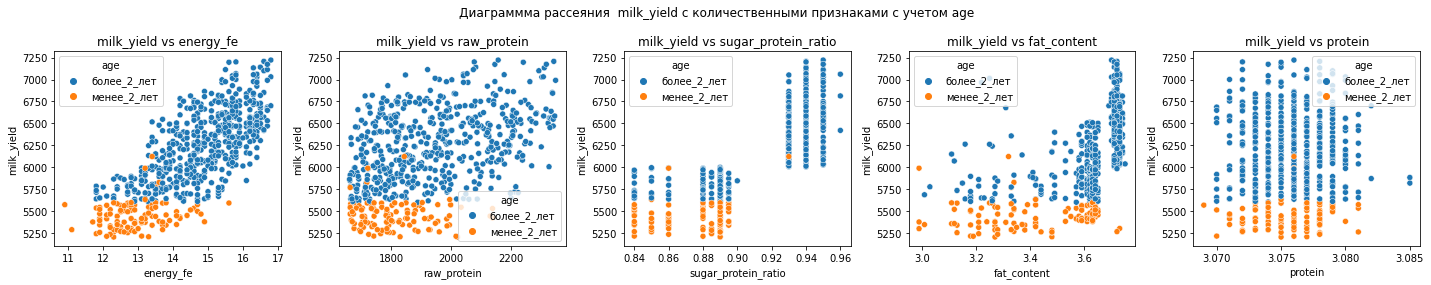

In [ ]:
def scatter_plt(hue):
    val_columns_ = [ 'energy_fe', 'raw_protein', 'sugar_protein_ratio', 'fat_content', 'protein']
    num_plots = len(val_columns_)

    # Создаем один ряд с num_plots подграфиками
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 4, 4))

    for i, col in enumerate(val_columns_):
        sns.scatterplot(data=ferma_main, x=col, y='milk_yield', hue=hue, ax=axes[i])
        axes[i].set_title(f'milk_yield vs {col}')

    # Подгонка расстояния между графиками
    fig.suptitle('Диаграммма рассеяния  milk_yield с количественными признаками с учетом ' + hue)
    plt.tight_layout()
    plt.show()

for col in cat_columns:
    scatter_plt(col)

#### Выводы по разделу "Корреляционный анализ признаков":
- Энергетическая кормовая база демонстрирует линейную, а возможно, даже квадратичную зависимость от удоя.
- Как ожидалось, коровы моложе 2 лет показывают более низкий уровень удоя.
-  Сахаро-протеиновое соотношение (СПО) делит выборку на две группы: чем выше показатель СПО, тем больше удой.
- По жирности молока также выделяются две группы: чем выше жирность, тем больше удой.
- Сырой протеин показывает значительную корреляцию с удоем.
- Уровень белка не демонстрирует корреляции с удоем и может быть исключён из модели.
- Наблюдается мультиколлинеарность признаков 'milk_yield' и 'age'.

In [ ]:
df = ferma_main[['milk_yield', 'energy_fe']].copy()
df['energy_fe_sq'] = df['energy_fe']**2
df.phik_matrix()

interval columns not set, guessing: ['milk_yield', 'energy_fe', 'energy_fe_sq']


,milk_yield,energy_fe,energy_fe_sq
milk_yield,1.000000,0.720719,0.722116
energy_fe,0.720719,1.000000,0.979902
energy_fe_sq,0.722116,0.979902,1.000000


### 5. Линейная регрессия

In [ ]:
RANDOM_STATE = 42
data_model = {}
data_model={}

def create_LM(df,
              target_variable,
              cat_columns,
              val_columns,
              model_path="temporary.joblib",
              data=None,
              model=LinearRegression,
              evaluation=False,

             ):

    if evaluation and model_path:
        try:
            model_ = data_model[model_path][0]
        except:
            raise Error('Модели @model_path нет в сохраненных')

        if data is not None:
            encoder = data_model[model_path][1]
            scaler = data_model[model_path][2]

            data_test_scaled = scaler.transform(data[val_columns])
            data_ohe = encoder.transform(data[cat_columns])
            data_ohe = pd.DataFrame(data_ohe.toarray(), columns=encoder.get_feature_names(cat_columns))
            data = pd.concat([data_ohe, pd.DataFrame(data_test_scaled, columns=val_columns)], axis=1)
            if model==LinearRegression:
                return model_.predict(data)
            return model_.predict(data), model_.predict_proba(data)

        raise Error('В режиме evaluation необходимо передать параметр data в функцию create_LM')

    X = df.drop(target_variable, axis=1)
    y = df[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        random_state=RANDOM_STATE
    )

    encoder = OneHotEncoder(drop='first')
    encoder.fit(X_train[cat_columns])
    X_train_ohe = encoder.transform(X_train[cat_columns])
    X_test_ohe = encoder.transform(X_test[cat_columns])

    encoder_col_names = encoder.get_feature_names(cat_columns)
    X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_col_names)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[val_columns])
    X_test_scaled = scaler.transform(X_test[val_columns])

    X_train = pd.concat([X_train_ohe, pd.DataFrame(X_train_scaled, columns=val_columns)], axis=1)
    X_test = pd.concat([X_test_ohe, pd.DataFrame(X_test_scaled, columns=val_columns)], axis=1)

    model = model()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    data_model[model_path] = [model, encoder, scaler]
    print("Модель сохранена в " + model_path )

    return model, predictions, y_test, X_test

def show_residuals(y_true, predictions):
    residuals = y_true - predictions
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals, bins=30)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(x=predictions, y=residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

def show_metrics(y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f'MAE = {mae:.0f}')
    print(f'R2 = {r2:.2f}')
    print(f'MSE = {mse:.2f}')
    print(f'RMSE = {rmse:.2f}')

#### 1-я модель линейной  регрессии

Модель сохранена в model_lr_1.joblib
MAE = 164
R2 = 0.78
MSE = 43887.02
RMSE = 209.49


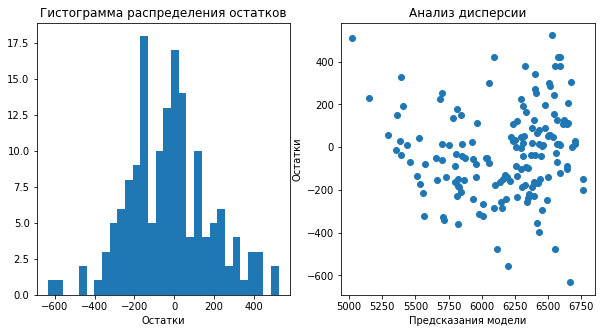

In [ ]:
cat_columns = ['breed', 'pasture_type', 'bull_father_breed',  'age']
val_columns = [ 'energy_fe', 'raw_protein', 'sugar_protein_ratio']

model_lr_1, predictions_1, y_test_1, X_test = create_LM(
    ferma_main,
    'milk_yield',
    cat_columns,
    val_columns,
    model_path='model_lr_1.joblib'
)

show_metrics(y_test_1, predictions_1)
show_residuals(y_test_1, predictions_1)

In [ ]:
errors1 = y_test_1 - predictions_1
errors1.describe()

count    157.000000
mean     -25.373286
std      208.615463
min     -632.814111
25%     -164.145968
50%      -34.294516
75%      108.696566
max      523.551641
Name: milk_yield, dtype: float64

Выводы по 1-й модели линейной регрессии:
- У остатков нарушается свойство постоянства дисперсии.
- Распределение остатков имеет две вершины, смещена чуть левее, среднее и медиана остатков отрицательные - модель завышает предсказание низкого удоя
- Модель в работе использовать нежелательно, её нужно улучшить.

#### 2-я модель линейной регрессии

In [ ]:
def categorize(value, threshold):
    if value > threshold:
        return 'больше '+str(threshold)
    return 'меньше'+str(threshold)

df = ferma_main.copy()
df['sugar_protein_ratio_cat'] = df['sugar_protein_ratio'].apply(lambda x: categorize(x, threshold=0.92))
#df['fat_content_cat'] = df['fat_content'].apply(lambda x: categorize(x, threshold=3.65))
df['energy_fe_square'] = df['energy_fe'] ** 2

Модель сохранена в model_lr_2.joblib
MAE = 149
R2 = 0.82
MSE = 37030.91
RMSE = 192.43


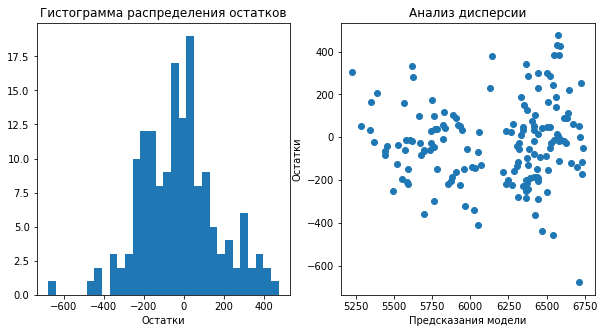

In [ ]:
cat_columns = ['breed', 'pasture_type', 'bull_father_breed', 'age', 'sugar_protein_ratio_cat', ]
val_columns = ['energy_fe_square', 'raw_protein',]
model_lr_2, predictions_2, y_test_2, X_test = create_LM(
    df,
    'milk_yield',
    cat_columns,
    val_columns,
    model_path='model_lr_2.joblib'
)
show_metrics(y_test_2, predictions_2)
show_residuals(y_test_2, predictions_2)

In [ ]:
errors2 = y_test_2 - predictions_2
errors2.describe()

count    157.000000
mean     -24.372798
std      191.495294
min     -677.411878
25%     -147.957591
50%      -27.871259
75%       60.191976
max      475.458320
Name: milk_yield, dtype: float64

Выводы по 2-й модели линейной регрессии:
- У остатков нарушается свойство постоянства дисперсии.  
- Распределение остатков имеет две вершины, модель завышает предсказание низкого удоя

#### 3-я модель линейной регрессии

In [ ]:
df = pd.merge(df, ferma_dad, on='id', how='left')
df.isna().sum()

id                         0
milk_yield                 0
energy_fe                  0
raw_protein                0
sugar_protein_ratio        0
breed                      0
pasture_type               0
bull_father_breed          0
fat_content                0
protein                    0
milk_taste                 0
age                        0
sugar_protein_ratio_cat    0
energy_fe_square           0
bull_father_name           0
dtype: int64

Модель сохранена в model_lr_3.joblib
MAE = 146
R2 = 0.82
MSE = 35673.89
RMSE = 188.88


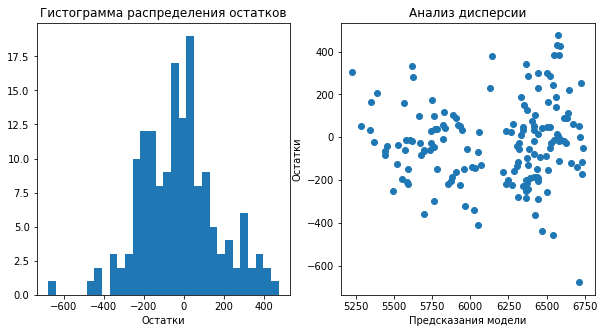

In [ ]:
cat_columns = ['breed', 'pasture_type', 'bull_father_breed', 'age', 'sugar_protein_ratio_cat', 'bull_father_name']
val_columns = ['energy_fe_square', 'raw_protein',]
model_lr_3, predictions_3, y_test_3, X_test = create_LM(
    df,
    'milk_yield',
    cat_columns,
    val_columns,
    model_path='model_lr_3.joblib'
)
show_metrics(y_test_3, predictions_3)
show_residuals(y_test_2, predictions_2)

In [ ]:
errors3 = y_test_3 - predictions_3
errors3.describe()

count    157.000000
mean     -15.201522
std      188.865034
min     -712.793903
25%     -144.381634
50%      -15.967703
75%      112.027110
max      437.597704
Name: milk_yield, dtype: float64

Выводы по 3-й модели линейной регрессии:
- Модель завышает предсказание низкого удоя
- По метрикам данная модель наилучшая.
- Принято решение использовать данную модель для предсказания

In [ ]:
lower_quantile = np.percentile(errors3, 2.5)
upper_quantile = np.percentile(errors3, 97.5)
lower_quantile

-393.099637079012

In [ ]:
upper_quantile

355.93715119412155

#### Предсказание целевого признака

In [ ]:
cow_buy

,breed,pasture_type,bull_father_breed,bull_father_name,fat_content,protein,age
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [ ]:
cow_buy['energy_fe_square'] = (ferma_main['energy_fe'].mean()*1.05)**2
cow_buy['raw_protein'] = ferma_main['raw_protein'].mean()*1.05
cow_buy['sugar_protein_ratio_cat'] =  categorize(ferma_main['sugar_protein_ratio'].mean()*1.05, threshold=0.92)
cow_buy['sugar_protein_ratio'] =  ferma_main['sugar_protein_ratio'].mean()*1.05
cow_buy.head()

,breed,pasture_type,bull_father_breed,bull_father_name,fat_content,protein,age,energy_fe_square,raw_protein,sugar_protein_ratio_cat,sugar_protein_ratio
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.361138,2019.947532,больше 0.92,0.958744
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744


In [ ]:
cat_columns = ['breed', 'pasture_type', 'bull_father_breed', 'age', 'sugar_protein_ratio_cat', 'bull_father_name']
val_columns = ['energy_fe_square', 'raw_protein', ]
milk_yield_predictions = create_LM(
    df,
    'milk_yield',
    cat_columns,
    val_columns,
    model_path="model_lr_3.joblib",
    evaluation=True,
    data = cow_buy)

In [ ]:
cow_buy = pd.merge(cow_buy, pd.DataFrame(milk_yield_predictions, columns=['milk_yield_predictions']), left_index=True, right_index=True)
cow_buy

,breed,pasture_type,bull_father_breed,bull_father_name,fat_content,protein,age,energy_fe_square,raw_protein,sugar_protein_ratio_cat,sugar_protein_ratio,milk_yield_predictions
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6609.919297
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6378.711028
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6283.999775
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6593.089377
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6542.146066
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6425.380218
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6609.919297
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6571.259737
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6283.999775
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6400.540668


#### Выводы по разделу "Задача линейной регрессии":

- Были построены 3 модели линейной регрессии для предсказания показателей удоя.
- Первая модель показала наименьшее значение метрики R².
- У второй и третьей моделей метрика R² оказалась одинаковой, но по метрике
 RMSE третья модель продемонстрировала лучшие результаты.
- Погрешность предсказаний выбранной модели варьируется от -357 кг до +376 кг удоя в год.
- На основе третьей модели был выполнен прогноз удоев для коров, выставленных на продажу.

### 6. Задача классификации

In [ ]:
#columns = ['id',  'energy_fe', 'raw_protein', 'sugar_protein_ratio', 'breed', 'pasture_type', 'bull_father_breed',   'fat_content', 'protein', 'milk_taste', 'age']
#df = ferma_main[columns].copy()
#df['milk_taste'] = df['milk_taste'].apply(lambda x: 0 if x == 'не вкусно' else 1)

#cat_columns = ['breed', 'pasture_type', 'bull_father_breed', 'age']
#val_columns = ['energy_fe', 'raw_protein', 'sugar_protein_ratio', 'fat_content', 'protein']

#model_log_reg, predictions, y_test, X_test = create_LM(ferma_main, 'milk_taste', cat_columns, val_columns, model=LogisticRegression)
#acc = accuracy_score(y_test, predictions)
#acc

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>

В логистической модели уже важно использовать все признаки по максимуму. Характеристики молока − жирность, белок, уже будут важны для определения вкуса.
    
Логично использовать уже сразу, а не постепенно здесь вводить признаки, пробуя разные комбинации.
    
Если какие-то признаки окажутся незначимыми, то модель сама занулит веса или наначит очень небольшие. На качество, скорее всего, наличие лишних признаков никак не повлияет (пока их не будет слишком много и не наступит проклятие размерности, но нам до этого здесь далековато). Нам выгоднее сразу подать все, модель сама разберет нужное.

In [ ]:
cat_columns = [
    'breed',
    'pasture_type',
    'bull_father_breed',
    'age',
    'sugar_protein_ratio_cat',
    'bull_father_name'
]
val_columns = [
    'energy_fe_square',
    'raw_protein',
    'fat_content',
    'protein',
    'sugar_protein_ratio',
]

df['milk_taste'] = df['milk_taste'].apply(lambda x: 0 if x == 'не вкусно' else 1)

model_log_reg, predictions, y_test, X_test = create_LM(
    df,
    'milk_taste',
    cat_columns,
    val_columns,
    model=LogisticRegression,
    model_path="model_log_reg",
)
acc = accuracy_score(y_test, predictions)
acc

Модель сохранена в model_log_reg


0.6369426751592356

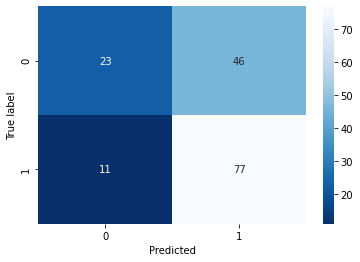

In [ ]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');


Необходимо максимально точно предсказать вкусное молоко. Значит надо настраивать метрику Precision.

In [ ]:
predictions = pd.Series(predictions)
precision = precision_score(y_test, predictions)
print('precision: ',round(precision,3))

precision:  0.626


In [ ]:
y_proba = model_log_reg.predict_proba(X_test)[:,1]

#### Настройка порога

In [ ]:
data = pd.DataFrame(
    zip(y_test, y_proba),
    columns = ['y_valid', 'y_proba']
).sort_values(by='y_proba',ascending=False)

thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 9,endpoint=False)]
columns = []



for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>i  else 0 )
data


,y_valid,y_proba,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9
114,1,0.848945,1,1,1,1,1,1,1,1,0
85,1,0.840188,1,1,1,1,1,1,1,1,0
17,1,0.835359,1,1,1,1,1,1,1,1,0
39,1,0.828460,1,1,1,1,1,1,1,1,0
8,1,0.827121,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
44,0,0.182565,1,0,0,0,0,0,0,0,0
84,0,0.180493,1,0,0,0,0,0,0,0,0
141,0,0.153527,1,0,0,0,0,0,0,0,0
46,0,0.141819,1,0,0,0,0,0,0,0,0


In [ ]:
data_thresholds = pd.DataFrame()
for col in columns:
    fp = np.sum(np.logical_and(data['y_valid'] == 0, data[col] == 1))
    tp = np.sum(np.logical_and(data['y_valid'] == 1, data[col] == 1))
    fn = np.sum(np.logical_and(data['y_valid'] == 1, data[col] == 0))
    new_row = pd.DataFrame({
        'thresholds': [col],
        'precision': [precision_score(data['y_valid'], data[col])],
        'recall': [recall_score(data['y_valid'], data[col])],
        'Число предсказанных объектов (TP)': [tp],
        'Всего объектов класса 1(TP+FP)': [fp+tp],

    })
    data_thresholds = pd.concat([data_thresholds, new_row], ignore_index=True)

data_thresholds

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,thresholds,precision,recall,Число предсказанных объектов (TP),Всего объектов класса 1(TP+FP)
0,y_pred_0.1,0.560510,1.000000,88,157
1,y_pred_0.2,0.578947,1.000000,88,152
2,y_pred_0.3,0.586667,1.000000,88,150
3,y_pred_0.4,0.600000,0.954545,84,140
4,y_pred_0.5,0.626016,0.875000,77,123
5,y_pred_0.6,0.744898,0.829545,73,98
6,y_pred_0.7,0.781818,0.488636,43,55
7,y_pred_0.8,1.000000,0.136364,12,12
8,y_pred_0.9,0.000000,0.000000,0,0


In [ ]:
thresholds = [round(i,2) for i in np.linspace(0.7, 0.85,num = 20,endpoint=False)]
columns = []

data_thresholds = pd.DataFrame()

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>i  else 0 )

for col in columns:
    fp = np.sum(np.logical_and(data['y_valid'], data[col] == 1))
    tp = np.sum(np.logical_and(data['y_valid'], data[col] == 1))
    fn = np.sum(np.logical_and(data['y_valid'], data[col] == 0))
    new_row = pd.DataFrame({
        'thresholds': [col],
        'precision': [precision_score(data['y_valid'], data[col])],
        'recall': [recall_score(data['y_valid'], data[col])],
        'Число предсказанных объектов (TP)': [tp],
        'Всего объектов класса 1(TP+FP)': [fp+tp],

    })
    data_thresholds = pd.concat([data_thresholds, new_row], ignore_index=True)


data_thresholds

,thresholds,precision,recall,Число предсказанных объектов (TP),Всего объектов класса 1(TP+FP)
0,y_pred_0.7,0.781818,0.488636,43,86
1,y_pred_0.71,0.795918,0.443182,39,78
2,y_pred_0.72,0.840909,0.420455,37,74
3,y_pred_0.72,0.840909,0.420455,37,74
4,y_pred_0.73,0.842105,0.363636,32,64
5,y_pred_0.74,0.837838,0.352273,31,62
6,y_pred_0.74,0.837838,0.352273,31,62
7,y_pred_0.75,0.861111,0.352273,31,62
8,y_pred_0.76,0.903226,0.318182,28,56
9,y_pred_0.77,0.923077,0.272727,24,48


#### Предсказание целевого признака  

In [ ]:
cat_columns = [
    'breed',
    'pasture_type',
    'bull_father_breed',
    'age',
   'sugar_protein_ratio_cat',
    'bull_father_name'
]
val_columns = [
    'energy_fe_square',
    'raw_protein',
    'fat_content',
    'protein',
    'sugar_protein_ratio',
]
milk_taste_predictions, milk_taste_proba = create_LM(
    df,
    'milk_taste',
    cat_columns,
    val_columns,
    model=LogisticRegression,
    model_path = "model_log_reg",
    data=cow_buy,
    evaluation=True
)

In [ ]:
milk_taste_proba = model_log_reg.predict_proba(X_test)[:,1]
milk_taste_proba = pd.DataFrame(milk_taste_proba, columns=['milk_taste_predictions'])
milk_taste_predictions = milk_taste_proba['milk_taste_predictions'].apply(lambda x: 'вкусно' if x>0.81  else 'не вкусно' )
milk_taste_predictions

0      не вкусно
1      не вкусно
2      не вкусно
3      не вкусно
4         вкусно
         ...    
152    не вкусно
153    не вкусно
154    не вкусно
155    не вкусно
156    не вкусно
Name: milk_taste_predictions, Length: 157, dtype: object

In [ ]:
cow_buy = pd.merge(
    cow_buy,
    milk_taste_predictions,
    left_index=True,
    right_index=True
)
cow_buy

,breed,pasture_type,bull_father_breed,bull_father_name,fat_content,protein,age,energy_fe_square,raw_protein,sugar_protein_ratio_cat,sugar_protein_ratio,milk_yield_predictions,milk_taste_predictions
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6609.919297,не вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6378.711028,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6283.999775,не вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6593.089377,не вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6542.146066,вкусно
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6425.380218,не вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6609.919297,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6571.259737,не вкусно
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6283.999775,вкусно
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6400.540668,не вкусно


In [ ]:
result = cow_buy.query('milk_yield_predictions> 6000 - @lower_quantile and milk_taste_predictions == "вкусно"')
result

,breed,pasture_type,bull_father_breed,bull_father_name,fat_content,protein,age,energy_fe_square,raw_protein,sugar_protein_ratio_cat,sugar_protein_ratio,milk_yield_predictions,milk_taste_predictions
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6542.146066,вкусно
17,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,233.361138,2019.947532,больше 0.92,0.958744,6425.380218,вкусно


### Вывод по разделу "Задача классификации"
- Была построена модель логистической регрессии на данных, подготовленных для 3-й модели линейной регрессии из предыдущего раздела.
- Поскольку основной задачей является максимально точное предсказание "вкусного" молока, было принято решение фокусироваться на метрике Precision.
- Для оптимизации модели был исследован Precision при различных пороговых значениях, и в итоге выбрано пороговое значение 079.
- с учетом данного порогового значения реализовано пердсказания целевого признака вкус молока (milk_taste).

### Общий вывод по проекту
В рамках данного проекта:
- Была проведена тщательная предобработка данных, включающая очистку дубликатов и корректировку форматов переменных.
- Построены модели линейной регрессии прогнозирования удоя, где третья модель показала лучшие результаты по метрикам R², RMSE, MAE.
- Построена модель логистической регрессии для прогнозирования вкуса молока. Модель логистической регрессии имеет низкое качество, acc = 0.63, что говорит о необходимости дополнительных признаков для более точного прогнозирования вкуса молока.
- На основе указанных моделей отобраны отобраны коровы с прогнозируемым удоем больше 6000 кг в год и вкусным молоком. Данные сохранены в переменную result.
- Фермеру для повышения удоя рекомендуется уделить внимание признаку Сахаро-протеиновое соотношение (СПО) в питании коров. Значение выше 0,92 знгачительно увеличивает удой у коров, а также на показатель Энергетическая кормовая база,

